In [2]:
import os
from pathlib import Path
from tkinter import messagebox

import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import numpy as np

# Load All Data 


In [3]:
# Priyank had his path hardcoded to his home directory. I have changed it to use a Path object

path = Path('Data')
raw_path = Path('Data')
output_path = Path('CleanedData')
# if not exists output_path, create it
output_path.mkdir(exist_ok=True)

In [4]:
# Set your path

path = 'Data'
# List all files in the directory
all_files = os.listdir(path)

# Filter only CSV files
csv_files = [f for f in all_files if f.endswith('.csv')]

# Initialize an empty dictionary to store DataFrames
dataframes = {}

# Loop through all the CSV files and read them into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(path, csv_file)
    dataframes[csv_file] = pd.read_csv(file_path)

# Now 'dataframes' is a dictionary with filenames as keys and DataFrames as values.

/var/folders/h9/ht4zpp_x2ld51gml9v3_lbnw0000gn/T/ipykernel_17628/2877852859.py:16: DtypeWarning: Columns (0,1,2,5,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes[csv_file] = pd.read_csv(file_path)
/var/folders/h9/ht4zpp_x2ld51gml9v3_lbnw0000gn/T/ipykernel_17628/2877852859.py:16: DtypeWarning: Columns (0,1,2,5,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes[csv_file] = pd.read_csv(file_path)


In [7]:
dataframes['001_r3.csv']

#INFO                          Unnamed: 1  \
0             #Study name  Neurorehabilitations_IAPS_group4_5   
1        #Respondent Name                                  r3   
2         #Respondent Age                                  30   
3      #Respondent Gender                                MALE   
4       #Respondent Group                             Default   
...                   ...                                 ...   
14421               14394                            91021.06   
14422               14395                          91028.8725   
14423               14396                          91030.6642   
14424               14397                          91032.6571   
14425               14398                          91032.6571   

                                     Unnamed: 2 Unnamed: 3 Unnamed: 4  \
0                                           NaN        NaN        NaN   
1      Id: 5f59c752-39d6-4a83-bb55-5763ab542f02        NaN        NaN   
2                                           NaN        NaN        NaN   
3                                           NaN        NaN        NaN   
4                                           NaN        NaN        NaN   
...                                         ...        ...        ...   
14421                                       NaN        NaN        NaN   
14422                                       NaN        NaN        NaN   
14423                                       NaN        NaN        NaN   
14424                                       1.0   EndMedia  TestImage   
14425                                       1.0   EndSlide  TestImage   

      Unnamed: 5      Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  ...  \
0            NaN             NaN        NaN        NaN        NaN  ...   
1            NaN             NaN        NaN        NaN        NaN  ...   
2            NaN             NaN        NaN        NaN        NaN  ...   
3            NaN             NaN        NaN        NaN        NaN  ...   
4            NaN             NaN        NaN        NaN        NaN  ...   
...          ...             ...        ...        ...        ...  ...   
14421        NaN             NaN  1410_7.00        NaN        NaN  ...   
14422        NaN             NaN  1410_7.00        NaN        NaN  ...   
14423        NaN             NaN  1410_7.00        1.0      179.0  ...   
14424     6000.0  StimuliDisplay  1410_7.00        NaN        NaN  ...   
14425     6000.0  StimuliDisplay  1410_7.00        NaN        NaN  ...   

      Unnamed: 63  Unnamed: 64 Unnamed: 65  Unnamed: 66 Unnamed: 67  \
0             NaN          NaN         NaN          NaN         NaN   
1             NaN          NaN         NaN          NaN         NaN   
2             NaN          NaN         NaN          NaN         NaN   
3             NaN          NaN         NaN          NaN         NaN   
4             NaN          NaN         NaN          NaN         NaN   
...           ...          ...         ...          ...         ...   
14421      2815.0  4099.794872      1919.0  1405.860806     51571.0   
14422      2815.0  4099.794872      1920.0  1406.593407     51575.0   
14423         NaN          NaN         NaN          NaN         NaN   
14424         NaN          NaN         NaN          NaN         NaN   
14425         NaN          NaN         NaN          NaN         NaN   

       Unnamed: 68 Unnamed: 69 Unnamed: 70 Unnamed: 71 Unnamed: 72  
0              NaN         NaN         NaN         NaN         NaN  
1              NaN         NaN         NaN         NaN         NaN  
2              NaN         NaN         NaN         NaN         NaN  
3              NaN         NaN         NaN         NaN         NaN  
4              NaN         NaN         NaN         NaN         NaN  
...            ...         ...         ...         ...         ...  
14421  1297.005471    0.771007        -1.0        -1.0        99.0  
14422  1294.024706    0.772783        -1.0        -1.0        99.0  

# Preprocess and Cleaning

In [4]:
def file_clean(df, filename):
    df = df[df[df[0] == "Row"].index[0]:]
    df = df.reset_index(drop=True)
    df.columns = df.iloc[0].tolist()
    df = df[1:]
    df["SlideEvent"] = df["SlideEvent"].ffill()
    df = df.loc[df.SlideEvent == "StartMedia"]
    # Drop columns if they exist in the DataFrame
    columns_to_drop = ["EventSource"]
    df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)
    df = df.reset_index(drop=True)
    df["Participant"] = filename
    return df


In [5]:

def clean_files(raw_path, output_path):
    columns_to_keep = [
        'Timestamp', 'Row', 'StimType', 'Duration', 'SourceStimuliName', 'CollectionPhase',
        'SlideEvent', 'Participant', 'SampleNumber', 'Anger', 'Contempt', 'Disgust', 'Fear', 
        'Joy', 'Sadness', 'Surprise', 'Engagement', 'Valence', 'Sentimentality', 'Confusion', 
        'Neutral','GSR RAW',	'GSR Resistance CAL', 'GSR Conductance CAL',	'Heart Rate PPG ALG', 
        'GSR Raw','GSR Interpolated','Tonic Signal','Phasic Signal'
    ]
    
    os.makedirs(output_path, exist_ok=True)
    
    for file in os.listdir(raw_path):
        file_path = os.path.join(raw_path, file)
        if not file_path.endswith('.csv'):
            continue
        try:
            df = pd.read_csv(file_path, header=None, low_memory=False)
        except pd.errors.ParserError as e:
            messagebox.showerror("Error", f"Error reading CSV file: {file_path}\n{e}")
            continue
        
        filename = file.split(".")[0].split("_")[1]
        cleaned_df = file_clean(df, filename)
        
        if cleaned_df is not None:
            # Keep only the columns that exist in the DataFrame
            existing_columns = [col for col in columns_to_keep if col in cleaned_df.columns]
            
            # If any columns are missing, print a message or log it
            missing_columns = [col for col in columns_to_keep if col not in cleaned_df.columns]
            if missing_columns:
                print(f"Warning: Missing columns {missing_columns} in file {file}")
            
            cleaned_df = cleaned_df[existing_columns]
            cleaned_csv_filename = f"{filename}_cleaned.csv"
            cleaned_csv_path = os.path.join(output_path, cleaned_csv_filename)
            cleaned_df.to_csv(cleaned_csv_path, index=False)
            print(cleaned_df)

In [6]:
clean_files(raw_path, output_path)

        Timestamp    Row   StimType Duration SourceStimuliName  \
0        296.0541     13  TestImage     6000         1440_8.19   
1          302.31     14        NaN      NaN         1440_8.19   
2        310.1225     15        NaN      NaN         1440_8.19   
3         317.935     16        NaN      NaN         1440_8.19   
4        325.7475     17        NaN      NaN         1440_8.19   
...           ...    ...        ...      ...               ...   
14219   91005.435  14392        NaN      NaN         1410_7.00   
14220  91013.2475  14393        NaN      NaN         1410_7.00   
14221    91021.06  14394        NaN      NaN         1410_7.00   
14222  91028.8725  14395        NaN      NaN         1410_7.00   
14223  91030.6642  14396        NaN      NaN         1410_7.00   

      CollectionPhase  SlideEvent Participant SampleNumber SampleNumber  ...  \
0      StimuliDisplay  StartMedia          r3          NaN          NaN  ...   
1                 NaN  StartMedia          r3  

# Load Clean Csv Files

In [5]:
# Set your path
path = output_path

# List all files in the directory
all_files = os.listdir(path)

# Filter only CSV files
csv_files = [f for f in all_files if f.endswith('.csv')]

# Initialize an empty dictionary to store DataFrames
dataframes = {}

# Loop through all the CSV files and read them into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(path, csv_file)
    dataframes[csv_file] = pd.read_csv(file_path)

# Now 'dataframes' is a dictionary with filenames as keys and DataFrames as values.


In [6]:

# Convert 'Timestamp' to datetime type and set it as index
for filename, df in dataframes.items():
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df.set_index('Timestamp', inplace=True)

# For example, to get mean 'Anger' level for each 'Participant'
for filename, df in dataframes.items():
    print(df.groupby('Participant')['Anger'].mean())

data = pd.DataFrame()
for filename, df in dataframes.items():
    data = pd.concat([data, df],axis=0)
data

Empty DataFrame
Columns: []
Index: []

In [11]:
data.columns

Index(['Row', 'StimType', 'Duration', 'SourceStimuliName', 'CollectionPhase',
       'SlideEvent', 'Participant', 'SampleNumber', 'SampleNumber.1', 'Anger',
       'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise',
       'Engagement', 'Valence', 'Sentimentality', 'Confusion', 'Neutral',
       'GSR RAW', 'GSR Resistance CAL', 'GSR Conductance CAL',
       'Heart Rate PPG ALG', 'GSR Raw', 'GSR Interpolated', 'Tonic Signal',
       'Phasic Signal'],
      dtype='object')

In [17]:
image = '1440_8.19'
df_imagen = df[df['SourceStimuliName'] == image]
df_imagen
df = df_imagen.copy()

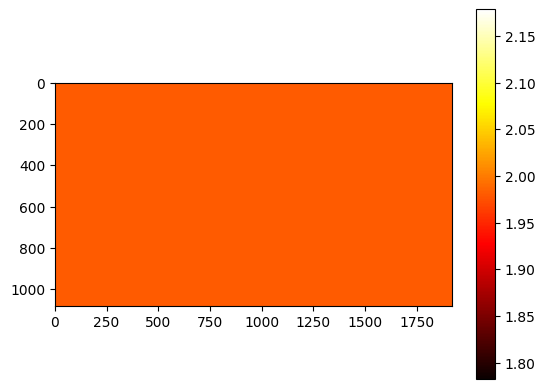

In [26]:
from scipy.ndimage import gaussian_filter

display_array = np.zeros((1080, 1920))
for i in range(1080):
    for j in range(1920):
        display_array[i, j] = df['GSR Raw'].mean()

display_array = gaussian_filter(display_array, sigma=5)

plt.imshow(display_array, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()


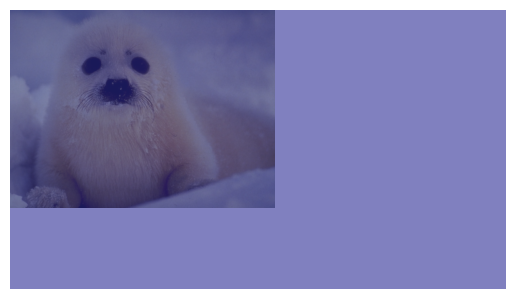

In [28]:
img = plt.imread('Images/positive/1440_8.19.jpg')
plt.imshow(img, alpha=0.8)
plt.axis("off")


smoothed = gaussian_filter(display_array, sigma=50)
plt.imshow(smoothed, cmap="jet", alpha=.5)
plt.show()

In [32]:
emotions = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Engagement', 'Valence', 'Sentimentality', 'Confusion', 'Neutral']

In [36]:
# interpolate emotional data
df = data.copy()
df[emotions]=df[emotions].interpolate(method='linear', limit_direction='both')

ValueError: alpha must be between 0 and 1, inclusive, but min is -0.3090902709960937, max is 0.9964402770996093

Error in callback <function _draw_all_if_interactive at 0x7fe18f01c670> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

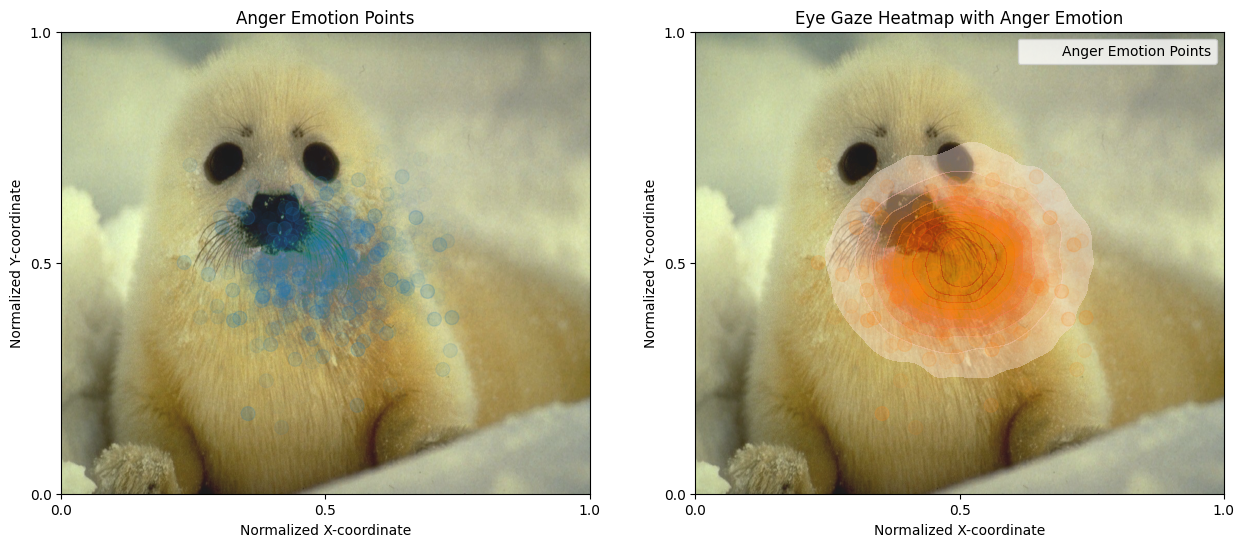

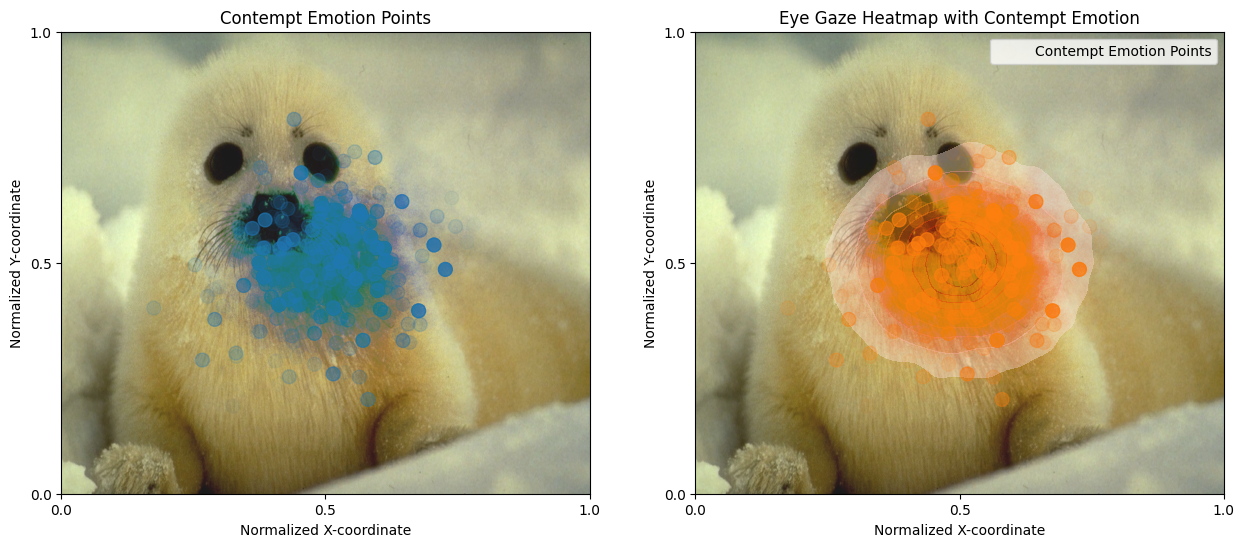

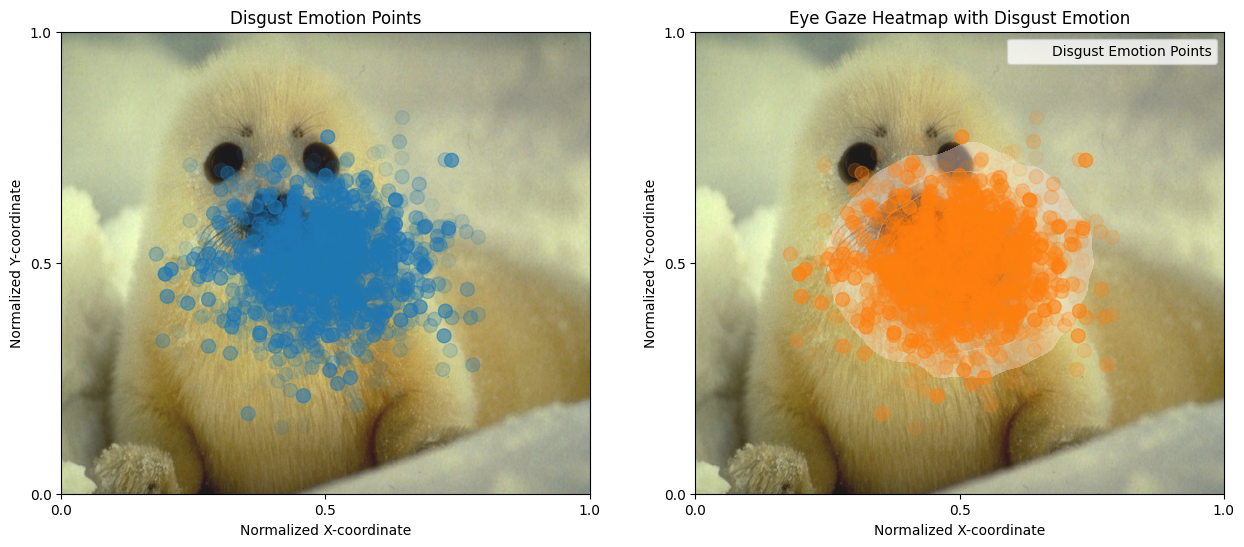

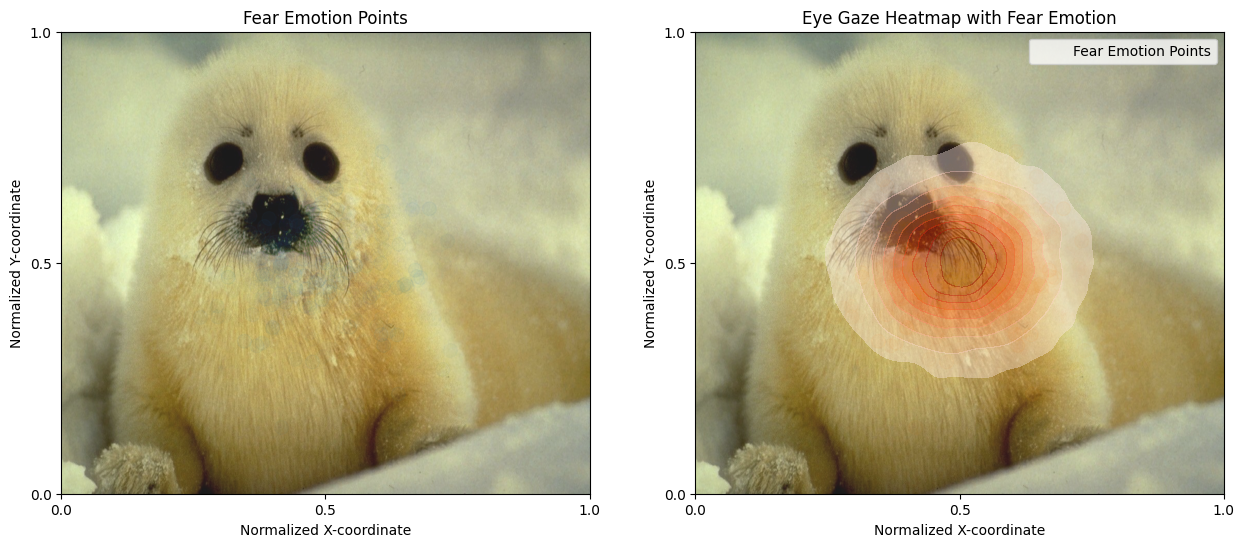

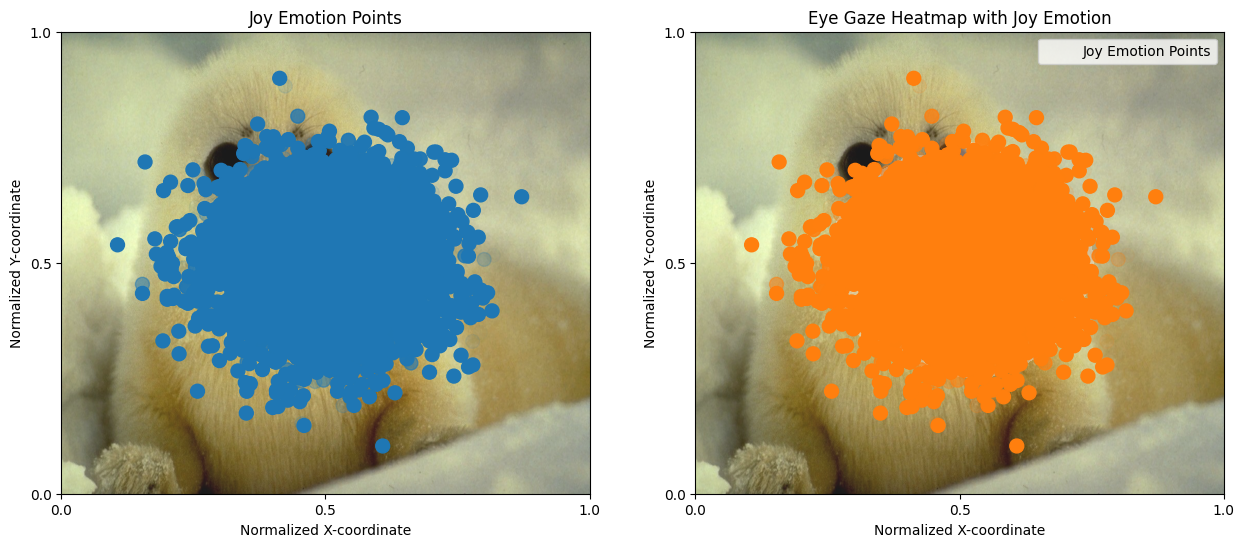

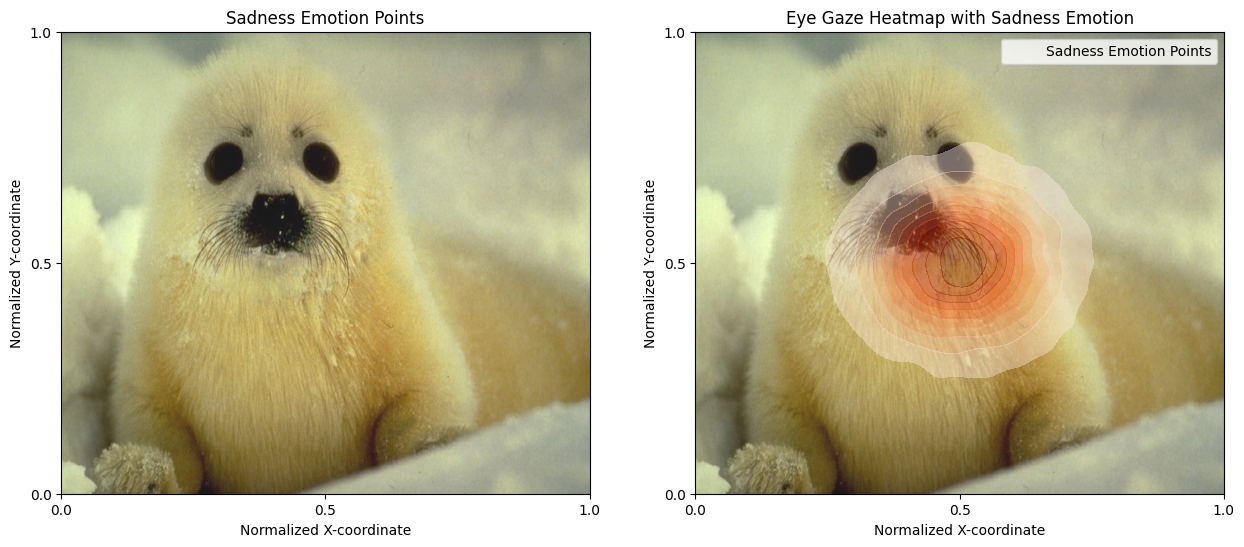

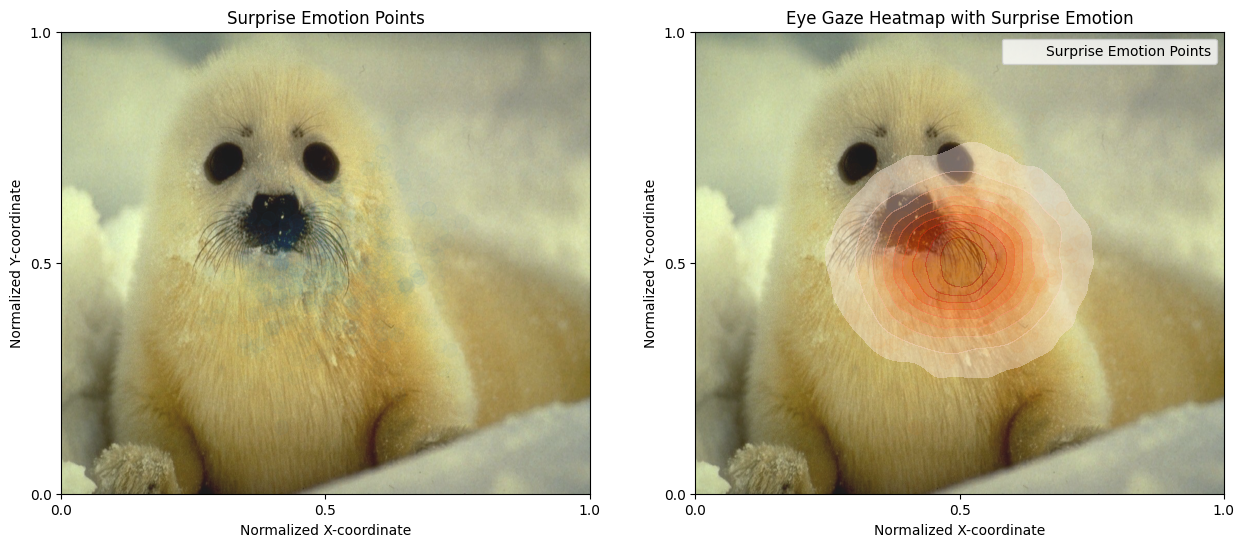

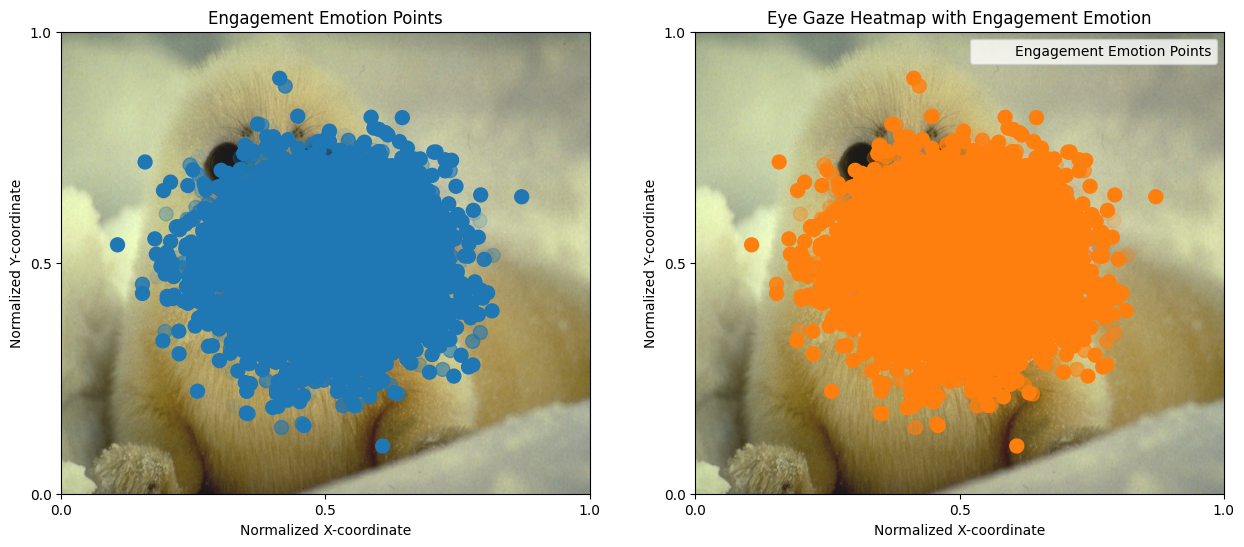

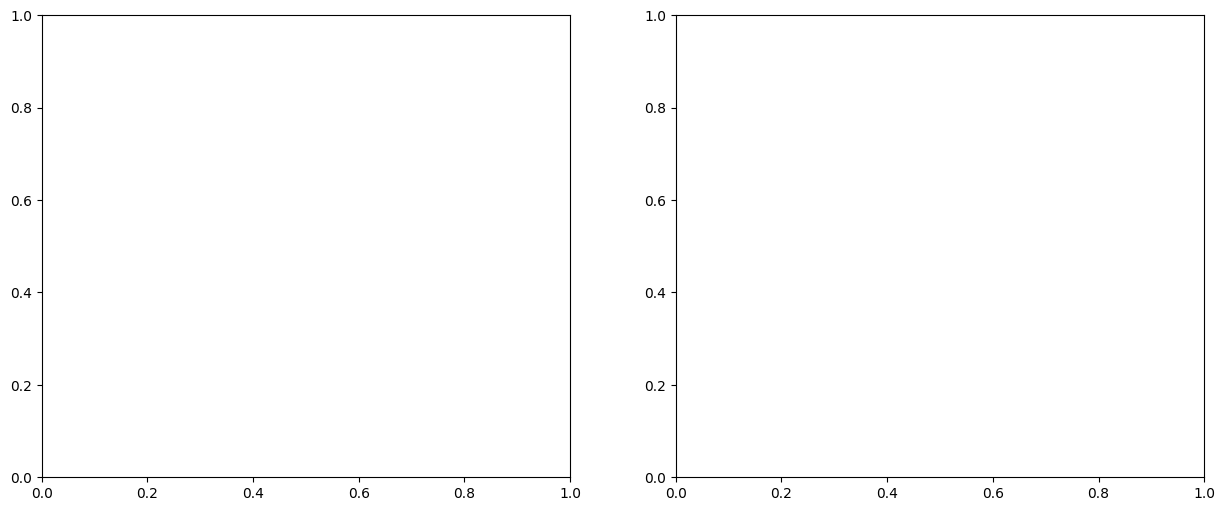

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from matplotlib.colors import ListedColormap, Normalize


#create random norm_x and norm_y between 0 and 1 and within 1 concentrated group
df['norm_x'] = np.random.normal(0.5, 0.1, len(df))
df['norm_y'] = np.random.normal(0.5, 0.1, len(df))

# Apply Gaussian filter
# df['norm_x'] = gaussian_filter(df['norm_x'], sigma=50)
# df['norm_y'] = gaussian_filter(df['norm_y'], sigma=50)



# Calculate the maximum value among all emotion columns
max_emotion_value = df[emotions].max().max()

# Create the figure and subplots for each emotion
figs = []
axss = []
for emotion in emotions:
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    figs.append(fig)
    axss.append(axs)

    # Add the colorbar manually for the current emotion on the right subplot
    emotion_label = f'{emotion} Level'

    

    # Left subplot - Scatter plot for the current emotion
    
    sc = axs[0].scatter(df['norm_x'], df['norm_y'],alpha=df[emotion]/100, label=f'{emotion} Emotion Points', s=100)
    axs[0].set_title(f'{emotion} Emotion Points')
    axs[0].set_xlabel('Normalized X-coordinate')
    axs[0].set_ylabel('Normalized Y-coordinate')

    # Set the axis ticks for the left subplot
    axs[0].set_xticks([0, 0.5, 1])
    axs[0].set_yticks([0, 0.5, 1])

    # Right subplot - Heatmap of eye gaze points with the current emotion levels and emotion points overlaid
    sns.kdeplot(data=df, x='norm_x', y='norm_y', fill=True, thresh=0.05, levels=10, cmap='Reds', ax=axs[1], alpha=0.4)
    axs[1].set_title(f'Eye Gaze Heatmap with {emotion} Emotion')
    axs[1].set_xlabel('Normalized X-coordinate')
    axs[1].set_ylabel('Normalized Y-coordinate')

    # Add the current emotion points as scatter points overlaid on the heatmap
    sc = axs[1].scatter(df['norm_x'], df['norm_y'], label=f'{emotion} Emotion Points', alpha=df[emotion]/100, s=100)

    # Add legend on the right subplot
    axs[1].legend()

    # Load the image
    image_path = 'Images/positive/1440_8.19.jpg'
    image = Image.open(image_path)

    # Resize the image to match the figure size
    fig_width, fig_height = fig.get_size_inches()
    resized_image = image.resize((int(fig_width * image.width), int(fig_height * image.height)))

    # Overlay the resized image with transparency (alpha) on both subplots
    axs[0].imshow(resized_image, extent=[0, 1, 0, 1], alpha=0.9, aspect='auto')
    axs[1].imshow(resized_image, extent=[0, 1, 0, 1], alpha=0.9, aspect='auto')

    axs[1].set_xticks([0, 0.5, 1])
    axs[1].set_yticks([0, 0.5, 1])

plt.show()

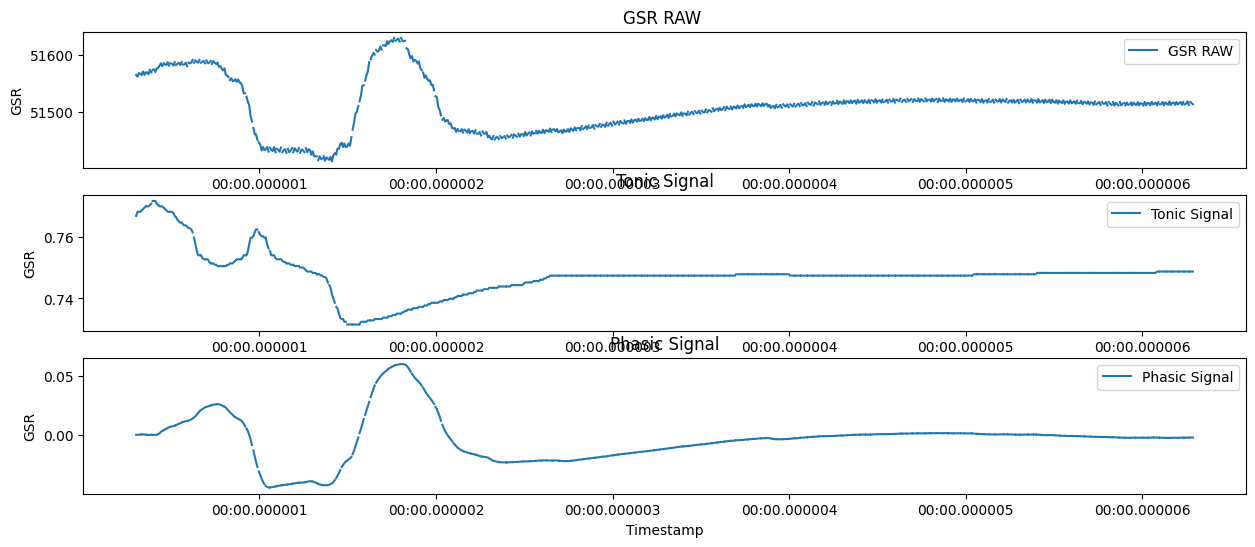

In [18]:
figs = []
axss = []
#plot GSR and tonic signal and phasic signal
fig, axs = plt.subplots(3, 1, figsize=(15, 6))
figs.append(fig)
axss.append(axs)

# Left subplot - GSR RAW and GSR Resistance CAL
axs[0].plot(df['GSR RAW'], label='GSR RAW')
axs[0].set_title('GSR RAW ')
axs[0].set_xlabel('Timestamp')
axs[0].set_ylabel('GSR')
axs[0].legend()

# Right subplot - Tonic Signal and Phasic Signal
axs[1].plot(df['Tonic Signal'], label='Tonic Signal')

axs[1].set_title('Tonic Signal')
axs[1].set_xlabel('Timestamp')
axs[1].set_ylabel('GSR')
axs[1].legend()

axs[2].plot(df['Phasic Signal'], label='Phasic Signal')
axs[2].set_title('Phasic Signal')
axs[2].set_xlabel('Timestamp')
axs[2].set_ylabel('GSR')
axs[2].legend()


plt.show()

In [22]:
import seaborn as sns

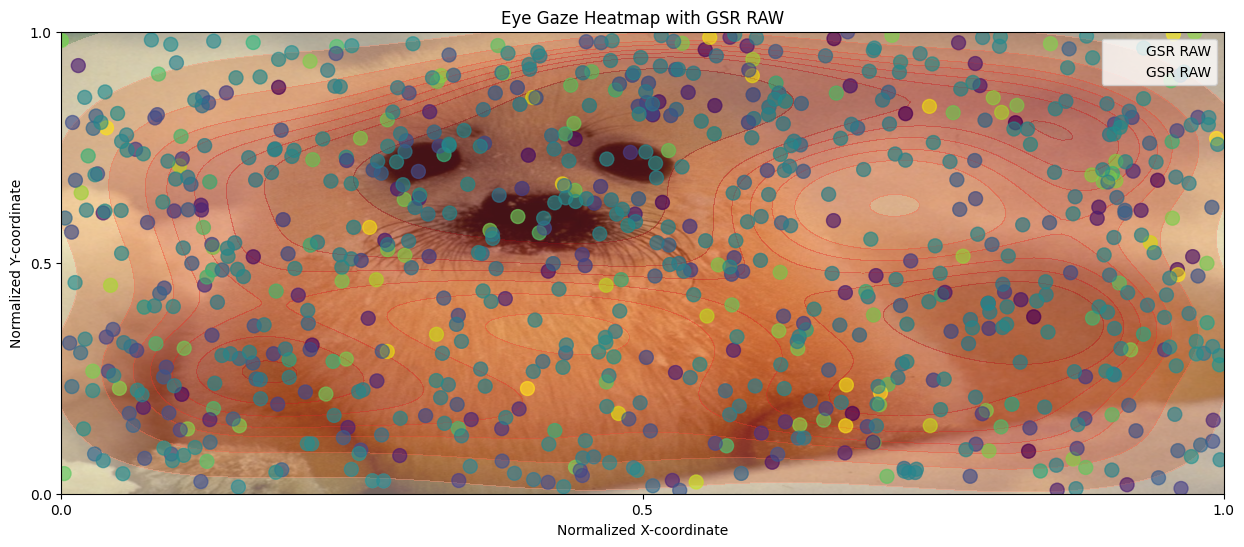

In [23]:
#plot GSR heatmap with emotion
figs = []
axss = []
# Create the figure and subplots for each emotion
fig, axs = plt.subplots(1, 1, figsize=(15, 6))
figs.append(fig)
axss.append(axs)

# Left subplot - Scatter plot for the current emotion
sc = axs.scatter(df['norm_x'], df['norm_y'], c=df['GSR RAW'], label='GSR RAW', alpha=0.5, s=100)
axs.set_title('GSR RAW')
axs.set_xlabel('Normalized X-coordinate')
axs.set_ylabel('Normalized Y-coordinate')

# Set the axis ticks for the left subplot
axs.set_xticks([0, 0.5, 1])
axs.set_yticks([0, 0.5, 1])

# Right subplot - Heatmap of eye gaze points with the current emotion levels and emotion points overlaid
sns.kdeplot(data=df, x='norm_x', y='norm_y', fill=True, thresh=0.05, levels=10, cmap='Reds', ax=axs, alpha=0.4)
axs.set_title('Eye Gaze Heatmap with GSR RAW')
axs.set_xlabel('Normalized X-coordinate')
axs.set_ylabel('Normalized Y-coordinate')

# Add the current emotion points as scatter points overlaid on the heatmap
sc = axs.scatter(df['norm_x'], df['norm_y'], c=df['GSR RAW'], label='GSR RAW', alpha=0.5, s=100)

# Add legend on the right subplot
axs.legend()

# Load the image
image_path = 'Images/positive/1440_8.19.jpg'
image = Image.open(image_path)

# Resize the image to match the figure size
fig_width, fig_height = fig.get_size_inches()
resized_image = image.resize((int(fig_width * image.width), int(fig_height * image.height)))

# Overlay the resized image with transparency (alpha) on both subplots
axs.imshow(resized_image, extent=[0, 1, 0, 1], alpha=0.9, aspect='auto')

axs.set_xticks([0, 0.5, 1])
axs.set_yticks([0, 0.5, 1])

plt.show()

# Plots

In [11]:

data['Participant'].unique()
df = data.copy()
df.SourceStimuliName.unique()
image_path = 'Images/positive/1440_8.19.jpg'
image = '1440_8.19'
df_imagen = df[df['SourceStimuliName'] == image]
df_imagen
df = df_imagen.copy()
#emotions = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Engagement', 'Valence', 'Sentimentality', 'Confusion', 'Neutral']

# Create a dictionary to store alpha values for each emotion
emotion_alpha = {
    'Anger': 0.02,
    'Contempt': 0.09,
    'Disgust': 0.15,
    'Fear': 0.21,
    'Joy': 0.32,
    'Sadness': 0.4,
    'Surprise': 0.52,
    'Engagement': 0.6,
    'Valence': 0.7,
    'Sentimentality': 0.8,
    'Confusion': 0.9,
    'Neutral': 1.0
}

# Create a dictionary to store different shades of red for each emotion
emotion_colors = {
    'Anger': (1.0, 0.2, 0.2),        # Light red
    'Contempt': (1.0, 0.1, 0.1),     # Slightly darker red
    'Disgust': (1.0, 0.0, 0.0),      # Dark red
    'Fear': (0.8, 0.0, 0.0),         # Even darker red
    'Joy': (0.6, 0.0, 0.0),          # Very dark red
    'Sadness': (0.4, 0.0, 0.0),      # Almost black red
    'Surprise': (0.2, 0.0, 0.0),     # Nearly black red
    'Engagement': (0.5, 0.2, 0.2),   # Intermediate shade of red
    'Valence': (0.8, 0.4, 0.4),      # Lighter shade of red
    'Sentimentality': (0.9, 0.4, 0.4),# Even lighter red
    'Confusion': (0.5, 0.1, 0.1),    # Slightly darker shade
    'Neutral': (1.0, 0.5, 0.5),      # Neutral shade
}
emotions = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy',
       'Sadness', 'Surprise', 'Engagement', 'Valence', 'Sentimentality',
       'Confusion', 'Neutral']
# get the higher emotion for each row
# get the higher emotion for each row and store it in a new column
df['max_emotion'] = df[emotions].idxmax(axis=1)
df['max_emotion'].dropna(inplace=True)
df['max_emotion'] = df.max_emotion.fillna(0)
df
# plot image 
# Calculate the normalized x and y coordinates
df['norm_x'] = ((df['ET_GazeLeftx'] + df['ET_GazeRightx']) / 2) / 1920
df['norm_y'] = ((df['ET_GazeLefty'] + df['ET_GazeRighty']) / 2) / 1080



/var/folders/_n/z0v338m13rdgd8k269f74yq80000gn/T/ipykernel_83290/2858543630.py:47: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  df['max_emotion'] = df[emotions].idxmax(axis=1)


In [12]:
df

Row   StimType  Duration SourceStimuliName  \
Timestamp                                                                    
1970-01-01 00:00:00.000066511  7800  TestImage    6000.0         1440_8.19   
1970-01-01 00:00:00.000066526  7801        NaN       NaN         1440_8.19   
1970-01-01 00:00:00.000066543  7802        NaN       NaN         1440_8.19   
1970-01-01 00:00:00.000066548  7803        NaN       NaN         1440_8.19   
1970-01-01 00:00:00.000066559  7804        NaN       NaN         1440_8.19   
...                             ...        ...       ...               ...   
1970-01-01 00:00:00.000054431  6394        NaN       NaN         1440_8.19   
1970-01-01 00:00:00.000054448  6395        NaN       NaN         1440_8.19   
1970-01-01 00:00:00.000054454  6396        NaN       NaN         1440_8.19   
1970-01-01 00:00:00.000054464  6397        NaN       NaN         1440_8.19   
1970-01-01 00:00:00.000054465  6398        NaN       NaN         1440_8.19   

                              CollectionPhase  SlideEvent Participant  \
Timestamp                                                               
1970-01-01 00:00:00.000066511  StimuliDisplay  StartMedia          R7   
1970-01-01 00:00:00.000066526             NaN  StartMedia          R7   
1970-01-01 00:00:00.000066543             NaN  StartMedia          R7   
1970-01-01 00:00:00.000066548             NaN  StartMedia          R7   
1970-01-01 00:00:00.000066559             NaN  StartMedia          R7   
...                                       ...         ...         ...   
1970-01-01 00:00:00.000054431             NaN  StartMedia          R9   
1970-01-01 00:00:00.000054448             NaN  StartMedia          R9   
1970-01-01 00:00:00.000054454             NaN  StartMedia          R9   
1970-01-01 00:00:00.000054464             NaN  StartMedia          R9   
1970-01-01 00:00:00.000054465             NaN  StartMedia          R9   

                               SampleNumber  SampleNumber.1     Anger  ...  \
Timestamp                                                              ...   
1970-01-01 00:00:00.000066511           0.0             0.0       NaN  ...   
1970-01-01 00:00:00.000066526           NaN             NaN       NaN  ...   
1970-01-01 00:00:00.000066543           NaN             NaN       NaN  ...   
1970-01-01 00:00:00.000066548           1.0             1.0  0.161561  ...   
1970-01-01 00:00:00.000066559           NaN             NaN       NaN  ...   
...                                     ...             ...       ...  ...   
1970-01-01 00:00:00.000054431           NaN             NaN       NaN  ...   
1970-01-01 00:00:00.000054448           NaN             NaN       NaN  ...   
1970-01-01 00:00:00.000054454         179.0           179.0  0.010331  ...   
1970-01-01 00:00:00.000054464           NaN             NaN       NaN  ...   
1970-01-01 00:00:00.000054465           NaN             NaN       NaN  ...   

                               ET_PupilLeft  ET_PupilRight  SampleNumber.2  \
Timestamp                                                                    
1970-01-01 00:00:00.000066511           NaN            NaN             NaN   
1970-01-01 00:00:00.000066526      4.395523       3.894958             NaN   
1970-01-01 00:00:00.000066543      4.308044       4.315125             NaN   
1970-01-01 00:00:00.000066548           NaN            NaN             NaN   
1970-01-01 00:00:00.000066559           NaN            NaN             NaN   
...                                     ...            ...             ...   
1970-01-01 00:00:00.000054431     -1.000000      -1.000000             NaN   
1970-01-01 00:00:00.000054448     -1.000000      -1.000000             NaN   
1970-01-01 00:00:00.000054454           NaN            NaN             NaN   
1970-01-01 00:00:00.000054464           NaN            NaN             NaN   
1970-01-01 00:00:00.000054465     -1.000000      -1.000000             NaN   

                                 GSR 

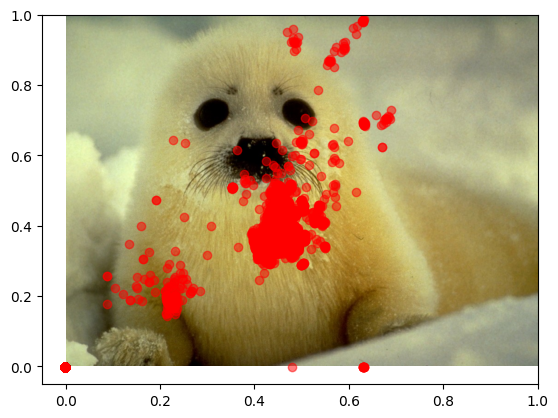

In [13]:

image = Image.open(image_path)
fig, ax = plt.subplots()
# ax.imshow(image)

fig_width, fig_height = fig.get_size_inches()
resized_image = image.resize((int(fig_width * image.width), int(fig_height * image.height)))
df
#df = df[df['max_emotion'] != 0]
plt.imshow(resized_image, extent=(0, 1, 0, 1), aspect='auto')
# do a scatter plot 
plt.scatter(df['norm_x'], df['norm_y'],alpha=0.5, c='red')#c=df['max_emotion'].apply(lambda x: emotion_colors[x]), alpha=df['max_emotion'].apply(lambda x: emotion_alpha[x]))
# plot
# plt.imshow(image)
# # combine the two plots into one
# plt.show()